### First, let's import all of the basics

In [8]:
%matplotlib inline
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import sklearn

import scipy.io.wavfile as wavfile
import scipy.signal as sig

### Now we import the data

In [13]:
data_root = "data/"
filename = "female_voice.wav"
path = data_root + filename

fs, data = wavfile.read(path)

### Let's look at the data a bit

sampling rate: 8000/sec
data length: 49 sec


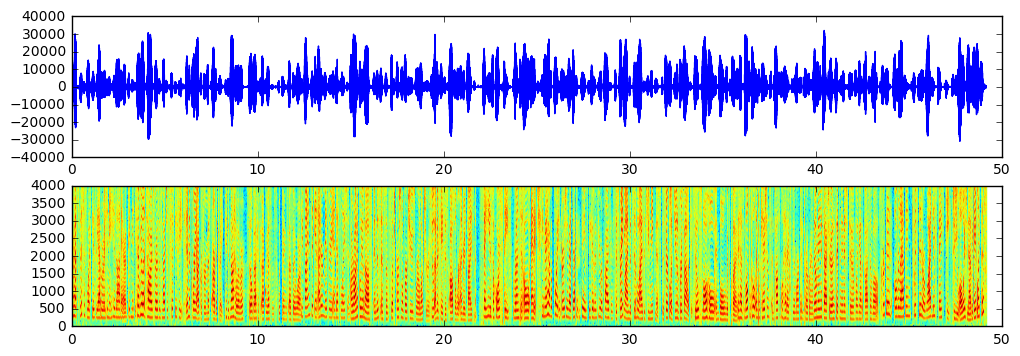

In [71]:
ln = len(data)

print "sampling rate: {}/sec".format(fs)
print "data length: {} sec".format(ln//fs)

def plot_audio(x, fs=fs):
    
    ln = len(x)
    t = np.arange(ln)/fs
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(2,1,1)
    plt.plot(t, x)
    
    plt.subplot(2,1,2)
    plt.specgram(x, Fs=fs, cmap="jet")
    
plot_audio(data)

### play the audio

In [24]:
from IPython.display import Audio

Audio(path)

### with additive white noise

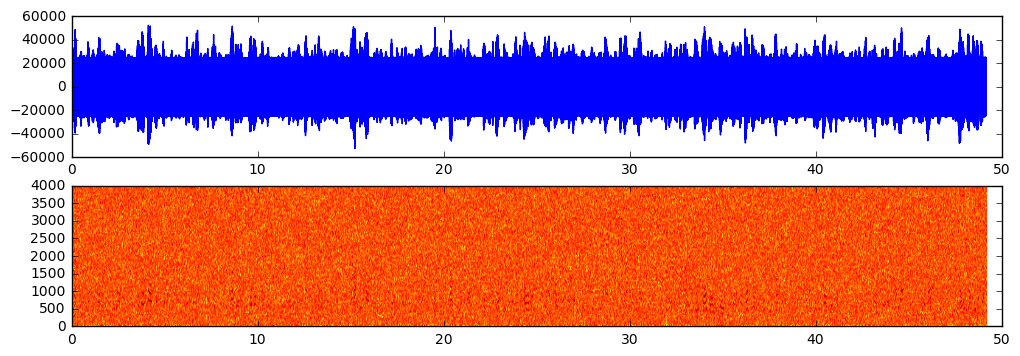

In [113]:
x = data + (np.random.rand(ln)-.5)*50000

plot_audio(x)

Audio(x, rate=fs)

### Let's create an adaptive line enhancer (ALE)

In [114]:
def ALE(x, N, z=1, epsilon=10**-6):
    # initialize, define vars
    ln = len(x)
    w = np.zeros(N)
    y = np.zeros(x.shape)
    # run, using normalized LMS, eta=1
    for ptr in xrange(N,ln):
        y[ptr] = x[ptr-N:ptr].dot(w)
        error = x[ptr] - y[ptr]
        # LMS update
        w = w + error*x[ptr-N:ptr]/(epsilon+x[ptr-N:ptr].dot(x[ptr-N:ptr]))
        W.append(w)
    return y, W
    
y, W = ALE(x, 64, 0)   

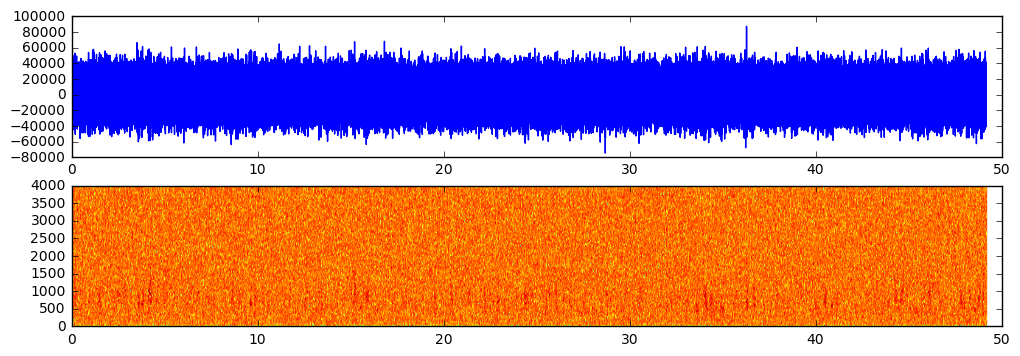

In [115]:
plot_audio(y)

Audio(y, rate=fs)

### Let's look at the effects of a MA filter

In [97]:
def MA_filt(x, order):
    w = np.ones(order)/order
    return sig.lfilter(w, 1, x)

def MA_filt2(x, order):
    w = np.ones(order)/order
    return np.convolve(x, w, mode='same')

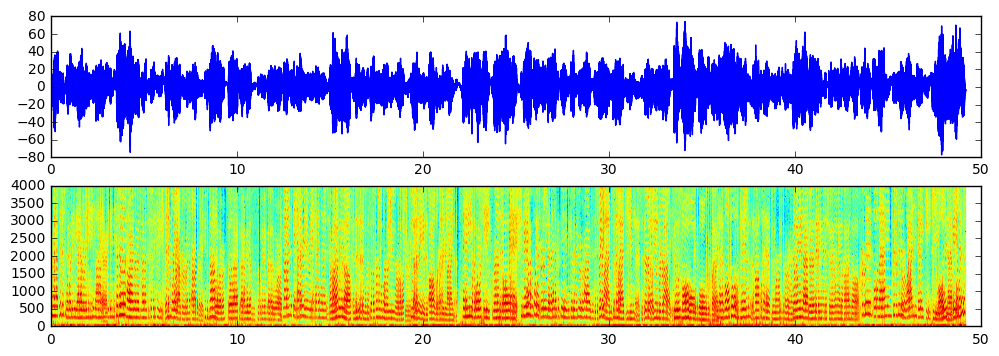

In [116]:
ma = MA_filt(data, 2**10)

plot_audio(ma)

Audio(ma, rate=fs)